In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from scipy.spatial import procrustes
from scipy.spatial.distance import jensenshannon


plt.style.use('ggplot')

data=pd.read_csv('combined_data_with_loc.csv')
#load feature category mapping
feature_category_dict=json.load(open('feature_category_dict.json'))
data.head()

,Community Name,Region,Map reference,Grid reference,Location,Population Density,Travel time to GPO (minutes),Distance to GPO (km),LGA,Primary Care Partnership,...,"Presentations to emergency departments, 2012-13",Nearest public hospital with emergency department,Travel time to nearest public hospital with emergency department,Distance to nearest public hospital with emergency department,Presentations to emergency departments due to injury,"Presentations to emergency departments due to injury, %",Category 4 & 5 emergency department presentations,"Category 4 & 5 emergency department presentations, %",cart_x,cart_y
0,Ascot Vale,Northern and Western Metropolitan,4,B3,6km NW of Melbourne,3758.623596,9.360142,6.958742,Moonee Valley (C),Inner North West Primary Care Partnership,...,3313.052180,Royal Melbourne Hospital,6.630953,4.993841,679.257076,20.502456,1864.918123,56.290032,-4.242641,4.242641e+00
1,Braybrook,Northern and Western Metropolitan,4,A3,10km WNW of Melbourne,2025.468296,15.131666,11.595888,Maribyrnong (C),"HealthWest (b): Hobson's Bay, Maribyrnong, Wyn...",...,2632.949379,Royal Melbourne Hospital,12.824977,10.161988,543.631989,20.647263,1683.966712,63.957428,-9.238795,3.826834e+00
2,Craigieburn,Northern and Western Metropolitan,2,A3,27km N of Melbourne,1034.970870,31.994666,43.100287,Hume (C),Hume-Whittlesea Primary Care Partnership,...,9915.723721,The Northern Hospital,11.570855,15.213189,2044.424399,20.618005,5102.134434,51.454988,0.000000,2.700000e+01
3,Croydon,Eastern Metropolitan,2,B4,28km E of Melbourne,1730.064830,28.992647,34.071323,Maroondah (C),Outer East Primary Care Partnership,...,6149.574954,Maroondah Hospital,5.093285,3.601752,1754.954941,28.537825,3062.182462,49.795026,28.000000,1.714506e-15
4,Fawkner,Northern and Western Metropolitan,4,C1,12km N of Melbourne,2619.120089,17.405267,13.047142,Moreland (C),Inner North West Primary Care Partnership,...,3799.030890,The Northern Hospital,11.510757,12.004044,680.401318,17.909865,1942.874353,51.141315,0.000000,1.200000e+01


In [2]:
# Define the feature for population change from 2007 to 2012
feat = 'Socio-demographic'

# Extract the relevant population data based on the feature
socio_data = data[feature_category_dict[feat]]

rows_with_nan = socio_data.isnull().any(axis=1)

print('Number of rows with NaN values:', rows_with_nan.sum())

# print the rows with NaN values
print('Community Names with NaN values:')
print(data['Community Name'][rows_with_nan])

# print % of columns with NaN values for these rows
print('Percentage of columns with NaN values for these rows:')

for i in range(0, len(rows_with_nan)):
	if rows_with_nan[i]:
		print(socio_data.iloc[i].isnull().mean()*100)


# print which columns have NaN values
print('Columns with NaN values:')
print(socio_data.columns[socio_data.isnull().any()])

# print total number of features considered
print('Total number of features:', len(socio_data.columns))

socio_data


Number of rows with NaN values: 6
Community Names with NaN values:
9     Melbourne Airport
22             Sorrento
26     St Andrews Beach
30               Toorak
31                Tyabb
32            Waterways
Name: Community Name, dtype: object
Percentage of columns with NaN values for these rows:
10.714285714285714
3.571428571428571
5.357142857142857
1.7857142857142856
1.7857142857142856
5.357142857142857
Columns with NaN values:
Index(['% dwellings which are public housing',
       'Dwellings with no motor vehicle, %',
       'Female-headed lone parent families, %',
       'Male-headed lone parent families, %', 'Unemployed, %',
       'Requires assistance with core activities, %',
       'Aged 75+ and lives alone, %'],
      dtype='object')
Total number of features: 56


,Number of Households,Average persons per household,Occupied private dwellings,"Occupied private dwellings, %",Population in non-private dwellings,Public Housing Dwellings,% dwellings which are public housing,Dwellings with no motor vehicle,"Dwellings with no motor vehicle, %",Dwellings with no internet,...,2nd top industry - persons,"2nd top industry, %",3rd top industry - persons,"3rd top industry, %",Top occupation,"Top occupation, %",2nd top occupation - persons,"2nd top occupation, %",3rd top occupation - persons,"3rd top occupation, %"
0,5546,2.433105,5634,92.269898,72,1467,24.025549,825,13.511300,1062,...,Health Care and Social Assistance,12.028964,Education and Training,10.359096,Professionals,33.146233,Clerical and Administrative Workers,16.484490,Managers,15.051699
1,2994,2.734469,2908,93.806452,<5,1310,42.258065,507,16.354839,820,...,Retail Trade,11.814024,Health Care and Social Assistance,10.213415,Labourers,18.181818,Professionals,16.190834,Clerical and Administrative Workers,13.410969
2,11051,2.964257,10328,93.508375,5,384,3.476686,367,3.322770,1374,...,Retail Trade,10.746229,Health Care and Social Assistance,10.305700,Clerical and Administrative Workers,17.676869,Technicians and Trades Workers,17.450157,Machinery Operators and Drivers,12.475828
3,10020,2.350699,9694,92.996930,439,461,4.422487,716,6.868764,1941,...,Manufacturing,13.063750,Construction,11.153950,Professionals,20.873136,Technicians and Trades Workers,16.828855,Clerical and Administrative Workers,16.802071
4,4552,2.769112,4403,92.325435,262,151,3.166282,534,11.197316,1497,...,Retail Trade,11.680078,Health Care and Social Assistance,8.997805,Professionals,16.739659,Technicians and Trades Workers,15.936740,Clerical and Administrative Workers,14.136253
5,5288,2.495461,5606,91.992123,645,719,11.798490,1277,20.955038,1048,...,Health Care and Social Assistance,10.000000,Retail Trade,9.865093,Professionals,27.742153,Clerical and Administrative Workers,14.461694,Labourers,12.149848
6,7566,2.598731,7414,92.397807,506,864,10.767697,995,12.400299,2103,...,Health Care and Social Assistance,11.592026,Construction,9.448389,Professionals,17.233869,Technicians and Trades Workers,16.866322,Clerical and Administrative Workers,15.613940
7,7666,2.620271,7569,92.024316,238,79,0.960486,795,9.665653,997,...,Health Care and Social Assistance,12.681827,Retail Trade,10.335997,Professionals,36.397324,Managers,18.188369,Clerical and Administrative Workers,14.472465
8,3739,2.542926,3733,91.562423,337,21,0.515085,306,7.505519,423,...,Health Care and Social Assistance,14.790381,Retail Trade,9.853160,Professionals,40.867139,Managers,19.896974,Clerical and Administrative Workers,13.243185
9,19,7.368421,32,100.000000,246,<5,NaN,6,18.750000,6,...,Accommodation and Food Services,17.543860,Manufacturing,15.789474,Managers,25.454545,Technicians and Trades Workers,18.181818,Community and Personal Service Workers,12.727273


In [3]:
# do a LISA analysis to see if there are any spatial patterns
import numpy as np
import pandas as pd
import geopandas as gpd
from pysal.lib import weights
from esda import Moran, Moran_Local
import matplotlib.pyplot as plt

np.random.seed(42)

# Data is assumed to be loaded with columns 'cart_x' and 'cart_y'
# GeoDataFrame creation with geometry based on coordinates
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['cart_x'], data['cart_y']))

# Create KNN weights with k=8 and row-standardize
w = weights.KNN.from_dataframe(gdf, k=8)
w.transform = 'R'  # Row-standardization

# Calculate global Moran's I
moran = Moran(socio_data['Equivalent household income <$600/week, %'], w, permutations=9999)
print(f"Moran's I for 'Equivalent household income <$600/week, %': {moran.I:.4f}")
print(f"P-value: {moran.p_sim:.4f}")



Moran's I for 'Equivalent household income <$600/week, %': 0.3144
P-value: 0.0005


In [4]:
# check the moran's I for all other features (individually)

# Create a dictionary to store the Moran's I values for each feature
moran_dict = {}
moran_p_dict = {}

feats=socio_data.columns

# keep only the features that are numeric and have no NaN values
feats = socio_data.columns[socio_data.dtypes == 'float64']
feats = feats[~socio_data[feats].isnull().any()]


# Iterate through each feature
for feat in feats:
	moran = Moran(socio_data[feat], w, permutations=9999)
	moran_dict[feat] = moran.I
	moran_p_dict[feat] = moran.p_sim

# Create a DataFrame from the dictionary
moran_df = pd.DataFrame.from_dict(moran_dict, orient='index', columns=['Moran I'])
moran_df['P-value'] = moran_df.index.map(moran_p_dict)

# Sort the DataFrame by Moran's I values
moran_df = moran_df.sort_values(by='Moran I', ascending=False)

moran_df

,Moran I,P-value
"Top occupation, %",0.509570,0.0001
"Did not complete year 12, %",0.477150,0.0001
"Holds degree or higher, %",0.465926,0.0001
"Personal income <$400/week, %",0.377140,0.0001
"Equivalent household income <$600/week, %",0.314443,0.0003
"Unpaid carer of children, %",0.268113,0.0014
"3rd top occupation, %",0.262366,0.0010
IRSD (max),0.209562,0.0038
% residing near PT,0.191828,0.0044
"Dwellings with no internet, %",0.184146,0.0064


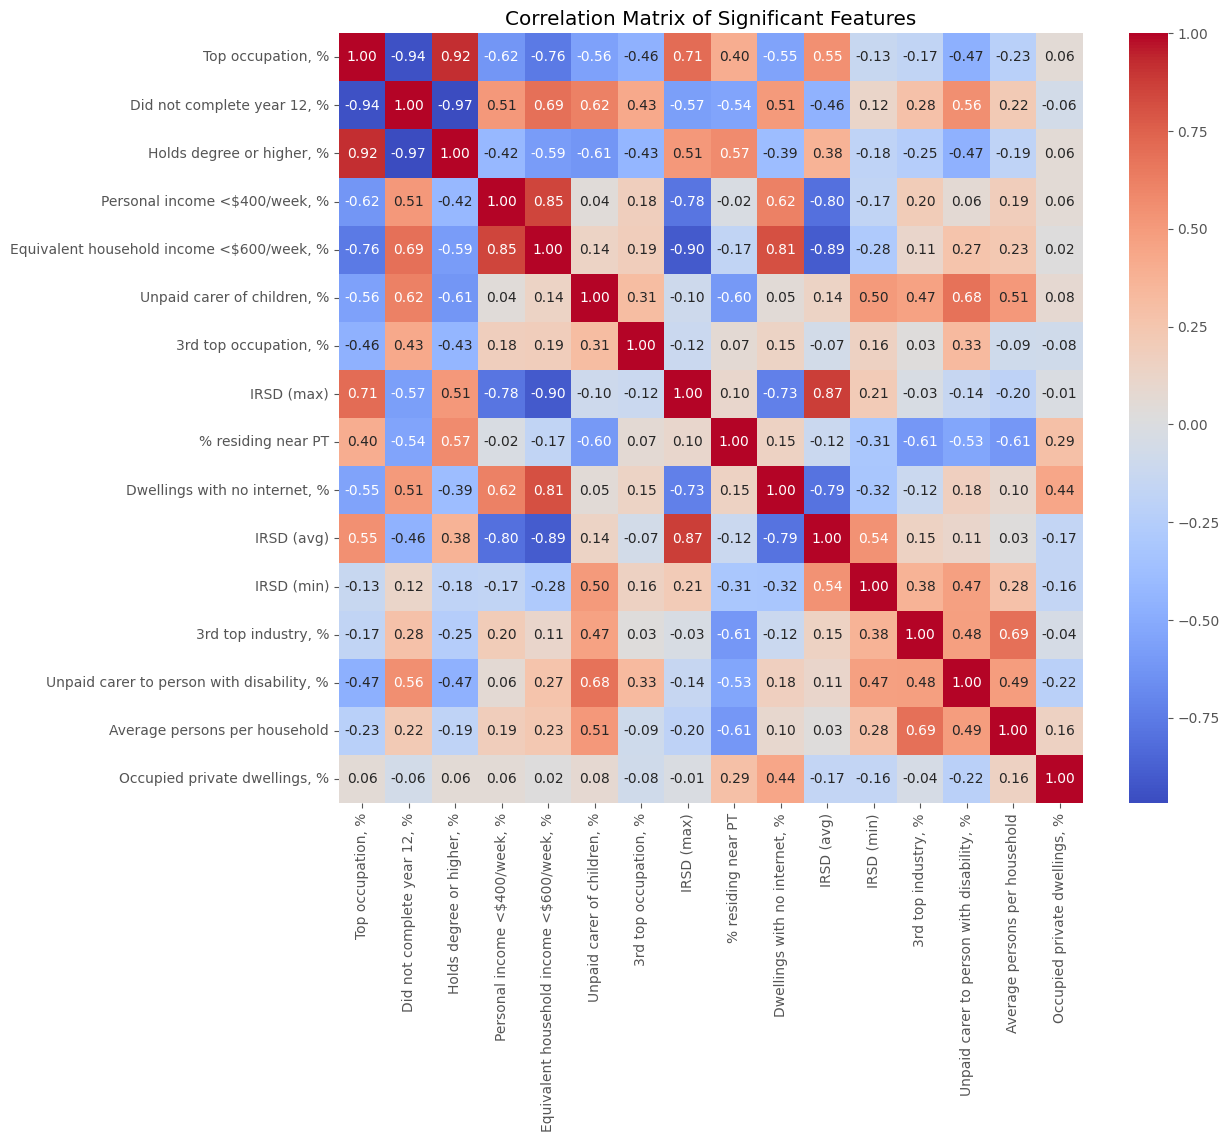

In [5]:
# do a corrplot of the significant features
# Create a DataFrame with the significant features
significant_feats = moran_df[moran_df['P-value'] < 0.05].index
significant_data = socio_data[significant_feats]

# Calculate the correlation matrix
corr = significant_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Significant Features')
plt.show()

Highly correlated features (Pearson correlation > 0.7 or <-0.7):
[('Top occupation, %', 'Did not complete year 12, %'), ('Top occupation, %', 'Holds degree or higher, %'), ('Top occupation, %', 'Equivalent household income <$600/week, %'), ('Top occupation, %', 'IRSD (max)'), ('Did not complete year 12, %', 'Holds degree or higher, %'), ('Personal income <$400/week, %', 'Equivalent household income <$600/week, %'), ('Personal income <$400/week, %', 'IRSD (max)'), ('Personal income <$400/week, %', 'IRSD (avg)'), ('Equivalent household income <$600/week, %', 'IRSD (max)'), ('Equivalent household income <$600/week, %', 'Dwellings with no internet, %'), ('Equivalent household income <$600/week, %', 'IRSD (avg)'), ('IRSD (max)', 'Dwellings with no internet, %'), ('IRSD (max)', 'IRSD (avg)'), ('Dwellings with no internet, %', 'IRSD (avg)')]
Highly correlated features (Spearman correlation > 0.7 or <-0.7):
[('Top occupation, %', 'Did not complete year 12, %'), ('Top occupation, %', 'Holds deg

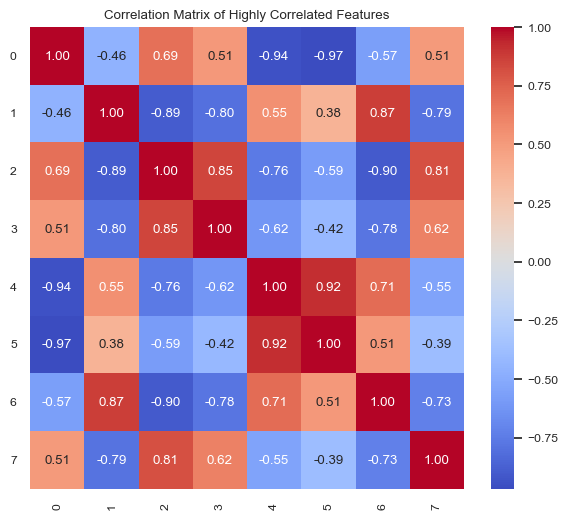

In [6]:
# print the features that are highly correlated (pearson correlation and spearman correlation > 0.7 or <-0.7)
# Calculate the correlation matrix
corr_pearson = significant_data.corr(method='pearson')
corr_spearman = significant_data.corr(method='spearman')

# Create a mask to display only the lower triangle of the matrix
mask = np.triu(np.ones_like(corr_pearson, dtype=bool))

# Find the highly correlated features
highly_correlated_pearson = (corr_pearson > 0.7) | (corr_pearson < -0.7)
highly_correlated_spearman = (corr_spearman > 0.7) | (corr_spearman < -0.7)

pairs_pearson = []
pairs_spearman = []

for i in range(len(highly_correlated_pearson.columns)):
	for j in range(i+1, len(highly_correlated_pearson.columns)):
		if highly_correlated_pearson.iloc[i, j]:
			pairs_pearson.append((highly_correlated_pearson.columns[i], highly_correlated_pearson.columns[j]))

for i in range(len(highly_correlated_spearman.columns)):
	for j in range(i+1, len(highly_correlated_spearman.columns)):
		if highly_correlated_spearman.iloc[i, j]:
			pairs_spearman.append((highly_correlated_spearman.columns[i], highly_correlated_spearman.columns[j]))


print('Highly correlated features (Pearson correlation > 0.7 or <-0.7):')
print(pairs_pearson)

print('Highly correlated features (Spearman correlation > 0.7 or <-0.7):')
print(pairs_spearman)

# print the length of the pairs
print('Number of highly correlated feature pairs (Pearson):', len(pairs_pearson))
print('Number of highly correlated feature pairs (Spearman):', len(pairs_spearman))


# take the intersection of the highly correlated features from pearson and spearman
# Find the intersection of highly correlated features
intersection = set(pairs_pearson).intersection(set(pairs_spearman))

print('Intersection of highly correlated features (Pearson and Spearman):')
print(intersection)

# print the length of the intersection
print('Number of highly correlated feature pairs (Intersection):', len(intersection))

# prepare a dataframe with the highly correlated features
# Create a DataFrame with the highly correlated features
highly_correlated_columns = list(set([pair[0] for pair in intersection]+[pair[1] for pair in intersection]))
highly_correlated_data = significant_data[highly_correlated_columns]

highly_correlated_data_corr = highly_correlated_data.corr()

# print the number of finally selected features
print('Number of finally selected features:', len(highly_correlated_columns))

# Plot the correlation matrix
plt.figure(figsize=(7, 6))
# set the font size of the heatmap
sns.set(font_scale=0.8)
sns.heatmap(highly_correlated_data_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Highly Correlated Features')

# shift the ticks to the center
plt.xticks(np.arange(len(highly_correlated_columns))+0.5, range(len(highly_correlated_columns)), rotation=90)
plt.yticks(np.arange(len(highly_correlated_columns))+0.5, range(len(highly_correlated_columns)), rotation=0)

plt.show()



In [7]:
# print the features w.r.t the index
print('Features:')
feat_vs_index = dict(enumerate(highly_correlated_columns))
print(pd.DataFrame.from_dict(feat_vs_index, orient='index', columns=['Feature']))

Features:
                                     Feature
0                Did not complete year 12, %
1                                 IRSD (avg)
2  Equivalent household income <$600/week, %
3              Personal income <$400/week, %
4                          Top occupation, %
5                  Holds degree or higher, %
6                                 IRSD (max)
7              Dwellings with no internet, %


<Figure size 1500x1500 with 0 Axes>

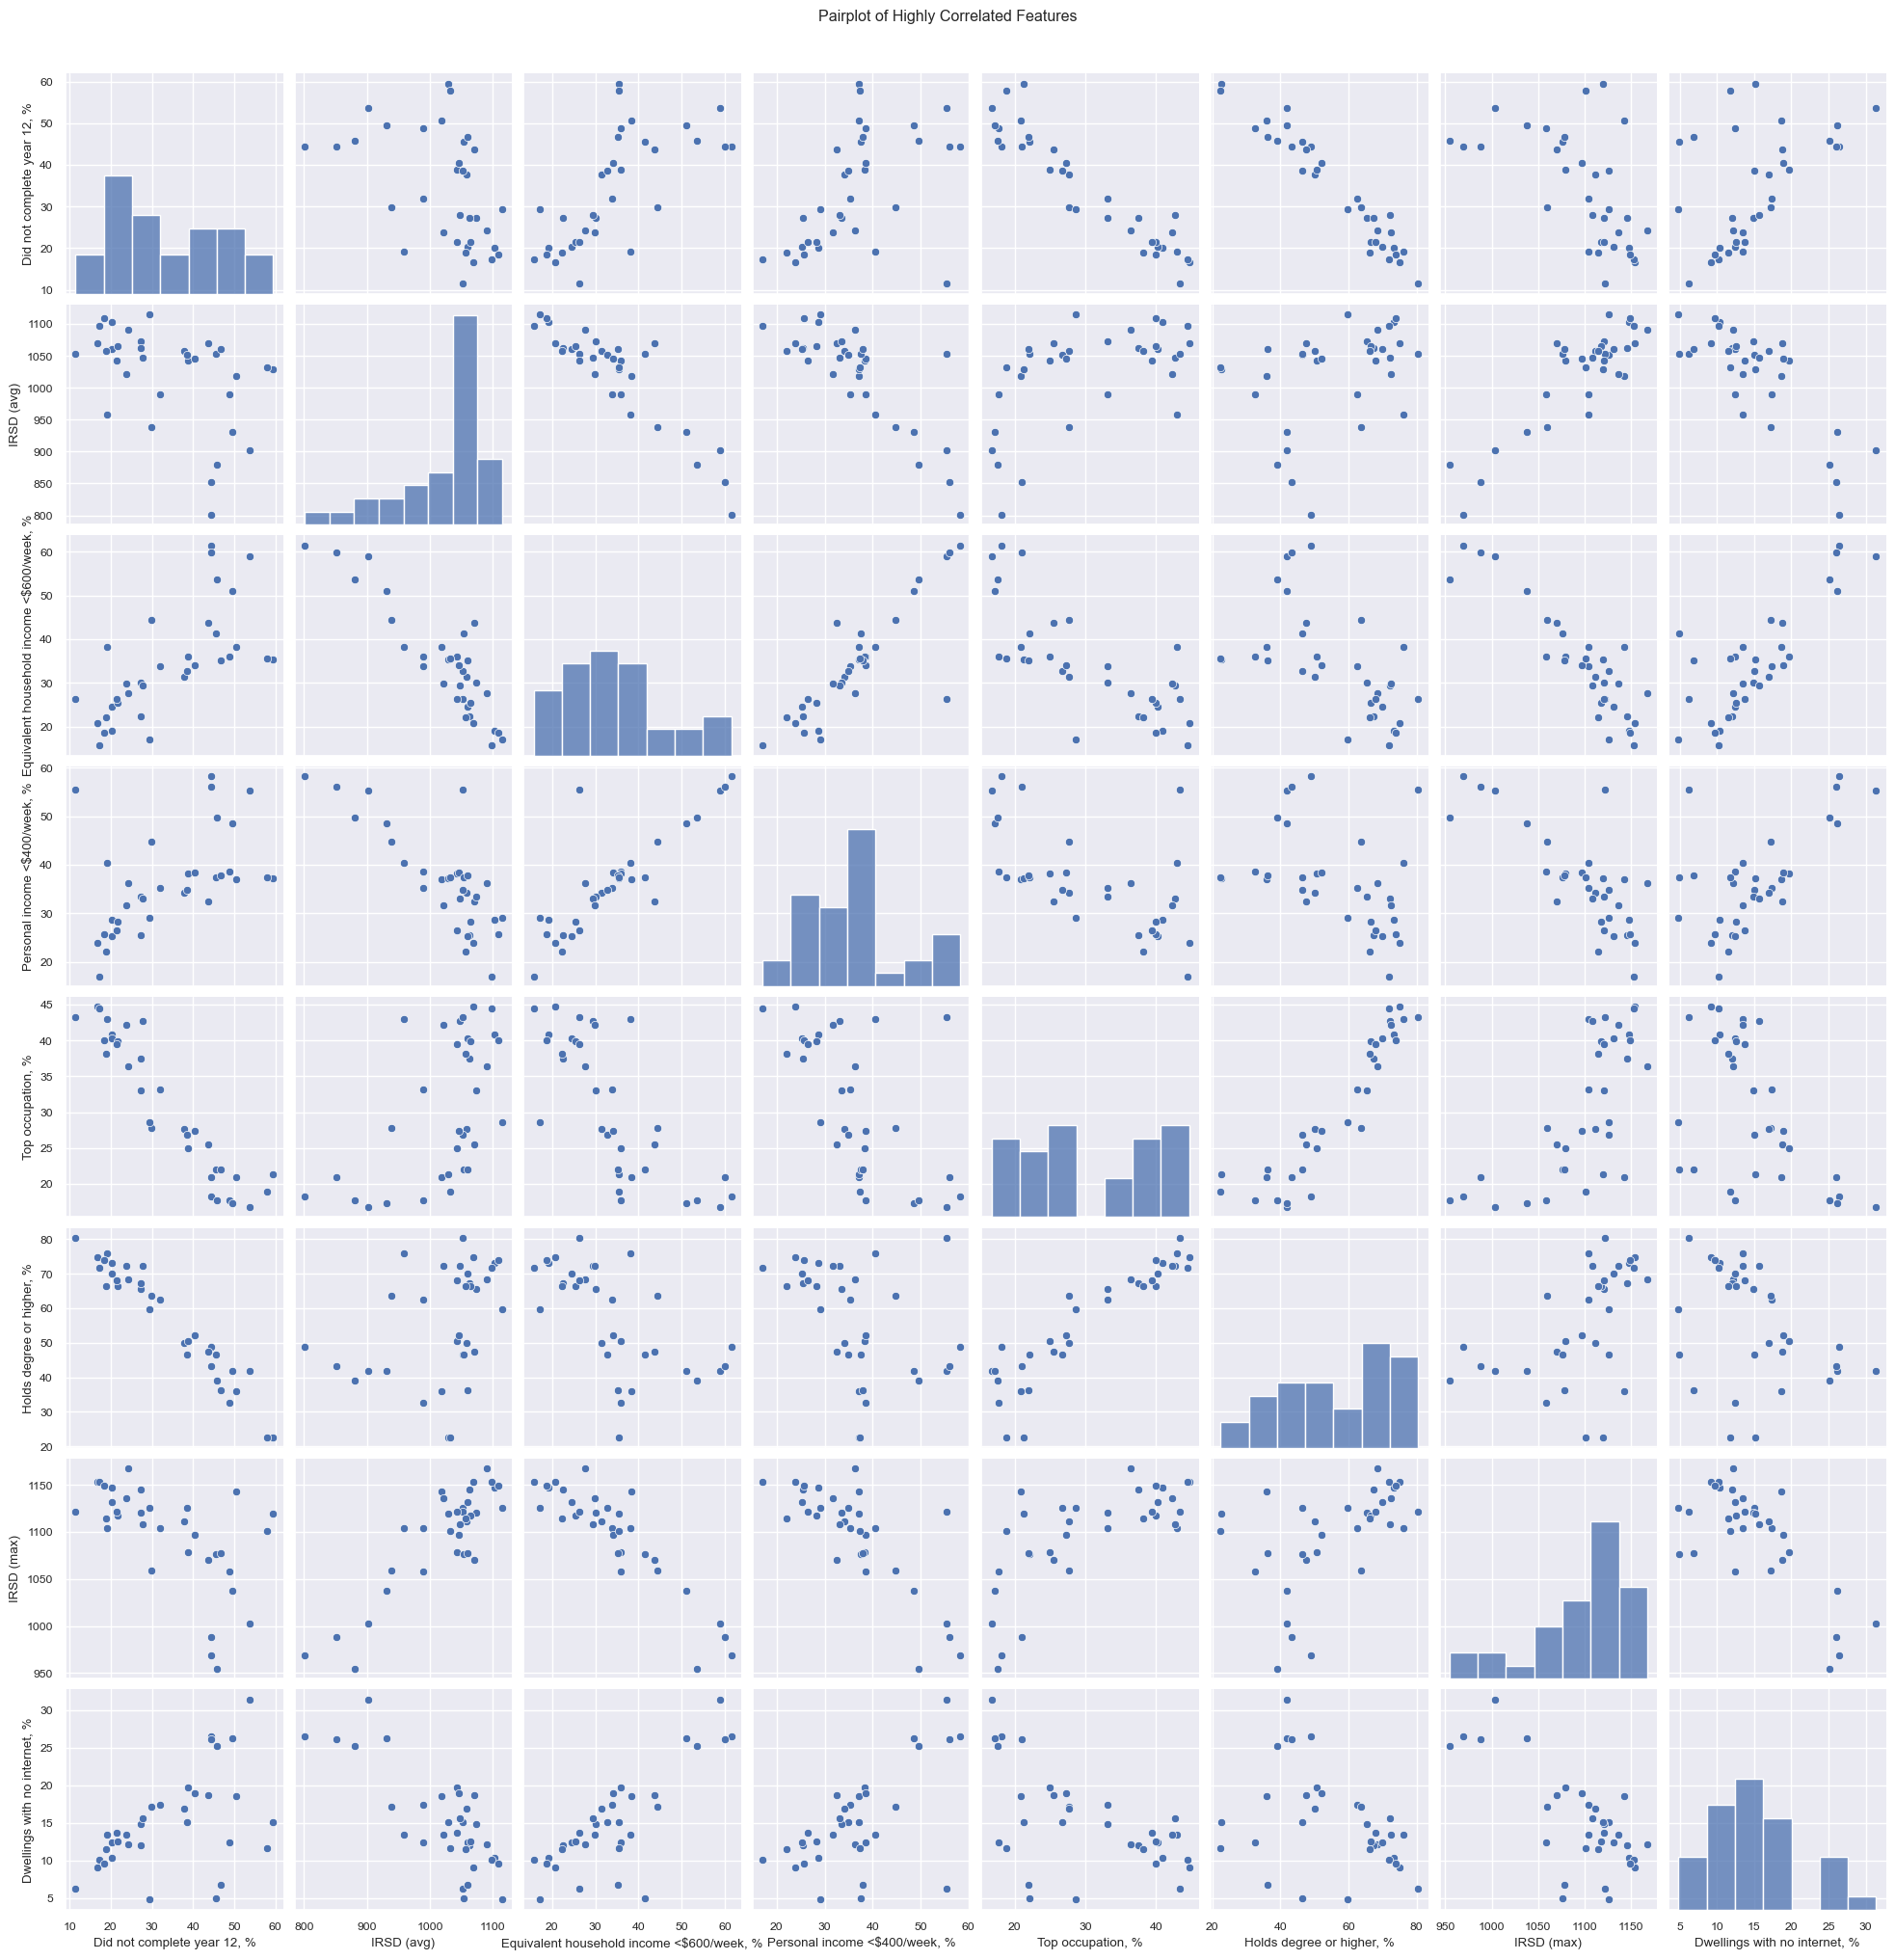

In [8]:
plt.figure(figsize=(15, 15))
# do an sns pairplot of the highly correlated features
sns.pairplot(highly_correlated_data)
plt.suptitle('Pairplot of Highly Correlated Features', y=1.02)
plt.show()

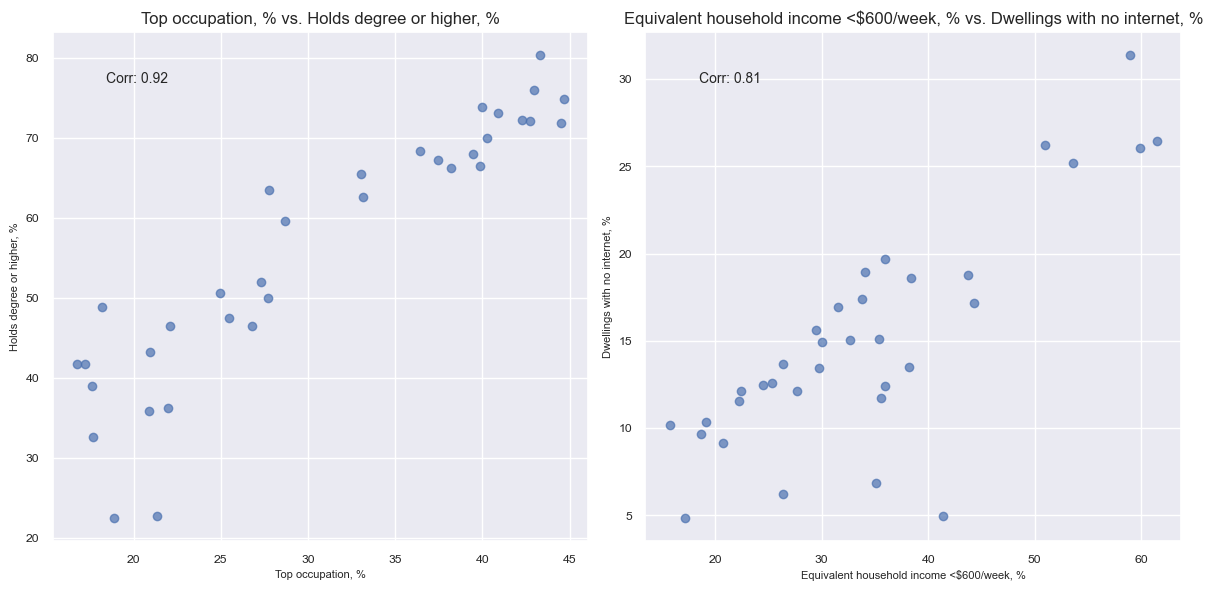

<Figure size 640x480 with 0 Axes>

In [9]:
final_feature_pairs = [
	('Top occupation, %', 'Holds degree or higher, %'),
	('Equivalent household income <$600/week, %', 'Dwellings with no internet, %')
]


# Plot the scatter plots for the final feature pairs
plt.figure(figsize=(12, 6))
for i, (feat1, feat2) in enumerate(final_feature_pairs, 1):
	plt.subplot(1, 2, i)
	plt.scatter(socio_data[feat1], socio_data[feat2], color='b', alpha=0.7)
	plt.title(f'{feat1} vs. {feat2}', fontsize=12)
	plt.xlabel(feat1, fontsize=8)
	plt.ylabel(feat2, fontsize=8)
	# print correlation coefficient
	corr = socio_data[[feat1, feat2]].corr().iloc[0, 1]
	plt.text(0.1, 0.9, f'Corr: {corr:.2f}', transform=plt.gca().transAxes, fontsize=10)
plt.tight_layout()

plt.savefig('../doc/figures/scatterplot_final_feature_pairs.png', dpi=110)
plt.show()
plt.clf()

# SDM

## Q1

In [10]:
# do Spatial Durbin Model
y = socio_data['Holds degree or higher, %'].values
X = socio_data['Top occupation, %'].values.reshape(-1, 1)

# Create a spatial weights matrix
w = weights.KNN.from_dataframe(gdf, k=8)
w.transform = 'R'

# Fit a spatial lag model
from pysal.model import spreg

model = spreg.ML_Lag(y, X, w, name_y='Holds degree or higher, %', name_x=['Top occupation, %'], name_w='KNN', name_ds='socio_data', slx_lags=1)

print(model.summary)


REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG WITH SLX - SPATIAL DURBIN MODEL (METHOD = FULL)
-------------------------------------------------------------------------------------------------
Data set            :  socio_data
Weights matrix      :         KNN
Dependent Variable  :Holds degree or higher, %                Number of Observations:          34
Mean dependent var  :     56.1819                Number of Variables   :           4
S.D. dependent var  :     16.1566                Degrees of Freedom    :          30
Pseudo R-squared    :      0.8985
Spatial Pseudo R-squared:  0.8819
Log likelihood      :   -104.0027
Sigma-square ML     :     25.7119                Akaike info criterion :     216.005
S.E of regression   :      5.0707                Schwarz criterion     :     222.111

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic   

## Q2

In [11]:
y = socio_data['Equivalent household income <$600/week, %'].values
X = socio_data['Dwellings with no internet, %'].values.reshape(-1, 1)

# Fit a spatial lag model
model = spreg.ML_Lag(y, X, w, name_y='Equivalent household income <$600/week, %', name_x=['Dwellings with no internet, %'], name_w='KNN', name_ds='socio_data', slx_lags=1)

print(model.summary)


REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG WITH SLX - SPATIAL DURBIN MODEL (METHOD = FULL)
-------------------------------------------------------------------------------------------------
Data set            :  socio_data
Weights matrix      :         KNN
Dependent Variable  :Equivalent household income <$600/week, %                Number of Observations:          34
Mean dependent var  :     34.0154                Number of Variables   :           4
S.D. dependent var  :     12.2235                Degrees of Freedom    :          30
Pseudo R-squared    :      0.7293
Spatial Pseudo R-squared:  0.6890
Log likelihood      :   -111.4750
Sigma-square ML     :     39.3250                Akaike info criterion :     230.950
S.E of regression   :      6.2710                Schwarz criterion     :     237.055

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error   

# LISA

## Q3

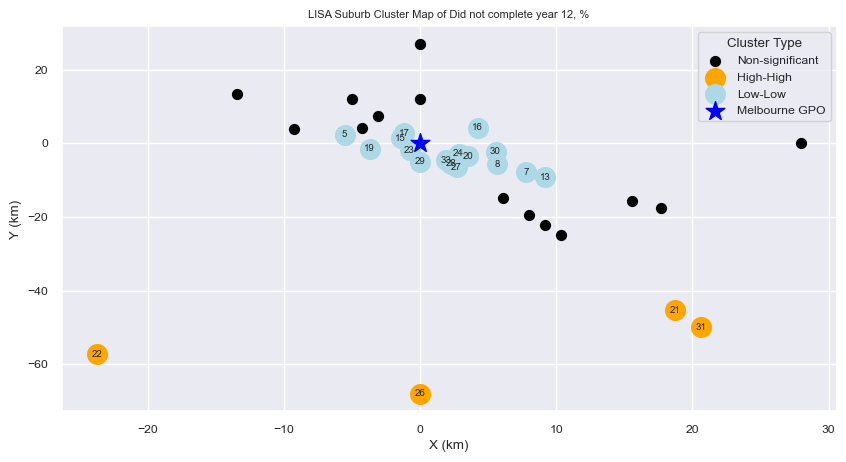

Statistics of significant clusters:
              count       mean       std        min        25%        50%  \
lisa_cluster                                                                
1               4.0  52.408659  7.300328  45.611157  46.378751  52.258799   
3              16.0  21.591409  4.862772  11.464140  18.808004  20.807395   

                    75%        max  
lisa_cluster                        
1             58.288707  59.505879  
3             24.960115  29.842400  
Mean distance from GPO for each significant cluster:
lisa_cluster
1    85.167622
3     7.304269
Name: Distance to GPO (km), dtype: float64


<Figure size 640x480 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from esda import Moran_Local
from libpysal import weights

def lisa_analysis(gdf, feature_name):
	np.random.seed(42)
	# Generate spatial weights matrix (KNN)
	w_new = weights.KNN.from_dataframe(gdf, k=8)
	
	# Perform Moran's I local analysis
	moran_local = Moran_Local(gdf[feature_name], w_new, permutations=9999)
	
	# Get LISA cluster values
	lisa_cluster = moran_local.q
	gdf['lisa_cluster'] = lisa_cluster
	
	# Get significance of clusters (p-value < 0.05)
	sig = moran_local.p_sim < 0.05
	gdf['significant'] = sig
	
	# Create the color map: High-High = orange, Low-Low = lightblue, others = black
	color_map = {1: 'orange', 3: 'lightblue'}  # Low-low = lightblue, High-high = orange
	gdf['color'] = gdf['lisa_cluster'].apply(lambda x: color_map.get(x, 'black') if gdf.loc[gdf['lisa_cluster'] == x, 'significant'].any() else 'black')
	
	# Extract coordinates for plotting
	x = gdf.geometry.x
	y = gdf.geometry.y
	
	# Plot using matplotlib, color points based on cluster
	plt.figure(figsize=(10,5))
	
	# Plot all points in black first (non-significant)
	plt.scatter(x[~gdf['significant']], y[~gdf['significant']], color='black', label='Non-significant', s=50)
	
	# Plot significant points, color them by their cluster (high-high = orange, low-low = lightblue)
	plt.scatter(x[gdf['significant'] & (gdf['color'] == 'orange')], 
				y[gdf['significant'] & (gdf['color'] == 'orange')], color='orange', label='High-High', s=200)
	plt.scatter(x[gdf['significant'] & (gdf['color'] == 'lightblue')], 
				y[gdf['significant'] & (gdf['color'] == 'lightblue')], color='lightblue', label='Low-Low', s=200)

	plt.title(f'LISA Suburb Cluster Map of {feature_name}', fontsize=8)
	plt.xlabel('X (km)')
	plt.ylabel('Y (km)')
	plt.scatter(0, 0, color='blue', marker='*', s=200, label='Melbourne GPO')

	# Adjust the legend and make it horizontal
	plt.legend(loc='upper right', bbox_to_anchor=(1, 1), title="Cluster Type")
	
	# annotate the suburbs with their index
	for i, txt in enumerate(gdf['Community Name']):
		# Only annotate significant points
		if gdf.loc[i, 'significant']:
			plt.annotate(i, (x[i], y[i]), fontsize=7, va='center', ha='center')

	# plot the origin as a star
	
	# save the plot
	plt.savefig(f'../doc/figures/lisa_cluster_map_{feature_name}.png', dpi=150)

	# Show plot
	plt.show()
	plt.clf()

	# Print statistics of the significant clusters
	print('Statistics of significant clusters:')
	print(gdf[gdf['significant']].groupby('lisa_cluster')[feature_name].describe())

	# Compute mean distance from GPO for each significant cluster
	mean_distance = gdf[gdf['significant']].groupby('lisa_cluster')['Distance to GPO (km)'].mean()
	print(f'Mean distance from GPO for each significant cluster:')
	print(mean_distance)

# Usage example:
lisa_analysis(gdf, 'Did not complete year 12, %')


# SDM Summary

In [13]:
import pandas as pd

# Data for the first row
data1 = {
    "y": ["Holds degree or higher, %"],
    "X": ["Top occupation, %"],
    "const": [-13.87490],
    "const_pval": [0.01561],
    "x_coef": [1.13616],
    "x_pval": [0.00000],
    "y_lag": [0.55277],
    "y_pval": [0.00729],
    "x_lag": [0.02518],
    "x_pval.1": [0.95674],
    "pR^2": [0.8985],
    "d_imp": [1.1362],
    "i_imp": [1.4606],
    "t_imp": [2.5968]
}

# Data for the second row
data2 = {
    "y": ["Equivalent household income <$600/week, %"],
    "X": ["Dwellings with no internet, %"],
    "const": [2.97949],
    "const_pval": [0.64077],
    "x_coef": [1.39183],
    "x_pval": [0.00000],
    "y_lag": [0.63805],
    "y_pval": [0.00037],
    "x_lag": [-0.68184],
    "x_pval.1": [0.20127],
    "pR^2": [0.7293],
    "d_imp": [1.3918],
    "i_imp": [0.5698],
    "t_imp": [1.9616]
}

# Create DataFrames for both data
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Merge the DataFrames
merged_df = pd.concat([df1, df2], ignore_index=True)

# Display the merged DataFrame
print(merged_df)


                                           y                              X  \
0                  Holds degree or higher, %              Top occupation, %   
1  Equivalent household income <$600/week, %  Dwellings with no internet, %   

      const  const_pval   x_coef  x_pval    y_lag   y_pval    x_lag  x_pval.1  \
0 -13.87490     0.01561  1.13616     0.0  0.55277  0.00729  0.02518   0.95674   
1   2.97949     0.64077  1.39183     0.0  0.63805  0.00037 -0.68184   0.20127   

     pR^2   d_imp   i_imp   t_imp  
0  0.8985  1.1362  1.4606  2.5968  
1  0.7293  1.3918  0.5698  1.9616  


In [14]:
merged_df

,y,X,const,const_pval,x_coef,x_pval,y_lag,y_pval,x_lag,x_pval.1,pR^2,d_imp,i_imp,t_imp
0,"Holds degree or higher, %","Top occupation, %",-13.87490,0.01561,1.13616,0.0,0.55277,0.00729,0.02518,0.95674,0.8985,1.1362,1.4606,2.5968
1,"Equivalent household income <$600/week, %","Dwellings with no internet, %",2.97949,0.64077,1.39183,0.0,0.63805,0.00037,-0.68184,0.20127,0.7293,1.3918,0.5698,1.9616
